In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

import requests

# CARGA DE LOS DATOS

Los datos han sido extraídos de esta página web oficial: https://catalog.data.gov/dataset/construction-related-incidents

Consiste en un dataset de 1047 registros con 20 variables. La descripción de las variables se puede obtener en esta página: https://data.cityofnewyork.us/Housing-Development/Construction-Related-Incidents/bf97-mjsy/about_data

In [2]:
pd.set_option("display.width", 200)      # extiende área de impresión
pd.set_option("display.max_colwidth", 500)  # ancho máx. por columna
pd.set_option("display.max_columns", 500) # muestra todas las columnas


In [4]:
url = "https://data.cityofnewyork.us/api/views/bf97-mjsy"
data = requests.get(url).json()

columns = data["columns"]  

schema = []

for col in columns:
    schema.append({
        "name": col.get("name"),
        "field_name": col.get("fieldName"),
        "type": col.get("dataTypeName"),
        "description": col.get("description")
    })

df_schema = pd.DataFrame(schema)
df_schema


,name,field_name,type,description
0,BIN,bin,text,Building Identification Number assigned by Dep...
1,Accident Report ID,accident_report_id,number,The Incident ID
2,Incident Date,incident_date_mm_dd_yyyy,calendar_date,The date of violation issuance. The “Incident ...
3,Record Type Description,record_type_description,text,The category of incident
4,Check2 Description,check2_description,text,The category of the associated cause of incident
5,Fatality,fatality,number,Count of Fatalities
6,Injury,injury,number,Count of Injuries
7,House Number,addressnumber,text,The address number where the violating conditi...
8,Street Name,street,text,The address name where the violating condition...
9,Borough,boro,text,The borough where the violating condition was ...


In [4]:
pd.set_option("display.width", 20)     
pd.set_option("display.max_colwidth", 50)  
pd.set_option("display.max_columns", None) 


In [5]:
url = "https://data.cityofnewyork.us/resource/bf97-mjsy.json"
df = pd.read_json(url)
df


,bin,accident_report_id,incident_date_mm_dd_yyyy,record_type_description,check2_description,fatality,injury,addressnumber,street,boro,block,lot,address_zipcode,address_latitude,address_longitude,address_communitydistrict,address_citycouncildistrict,address_bbl,address_censustract2020,address_nta2020
0,1034211.0,43977,2024-11-19T00:00:00.000,Incident,Other Construction Related,0,0,520,5 AVENUE,Manhattan,1259.0,35.0,10036.0,40.754421,-73.980213,105.0,4.0,1.012590e+09,96.0,MN0502
1,1060875.0,43984,2024-11-21T00:00:00.000,Incident,Other Construction Related,0,0,2855,FREDERICK DOUGLAS BOULEVARD,Manhattan,2046.0,63.0,10039.0,40.827410,-73.938587,110.0,9.0,1.020460e+09,23502.0,MN1002
2,3124075.0,45118,2025-10-07T00:00:00.000,Incident,Scaffold/Shoring Installations,0,0,23,OCEAN PARKWAY,Brooklyn,5322.0,4.0,11218.0,40.650467,-73.973610,307.0,40.0,3.053220e+09,50401.0,BK0701
3,1091801.0,44113,2024-12-30T00:00:00.000,Accident,Mechanical Construction Equipment,0,1,439,WEST 36 STREET,Manhattan,734.0,10.0,10018.0,40.755430,-73.997152,104.0,3.0,1.007340e+09,111.0,MN0401
4,2130685.0,43974,2024-11-14T00:00:00.000,Accident,Other Construction Related,0,1,221 D,MANIDA STREET,Bronx,2777.0,100.0,10474.0,40.805223,-73.885975,202.0,17.0,2.027770e+09,9302.0,BX0201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1079064.0,45077,2025-09-24T00:00:00.000,Accident,Worker Fell,0,1,55,John street,Manhattan,78.0,7511.0,10038.0,40.708988,-74.007654,101.0,1.0,1.000788e+09,1502.0,MN0101
996,2003543.0,45278,2025-11-14T00:00:00.000,Accident,Other Construction Related,0,1,1387,UNIVERSITY AVENUE,Bronx,2533.0,29.0,10452.0,40.842746,-73.925602,204.0,16.0,2.025330e+09,201.0,BX0402
997,1088177.0,45277,2025-11-14T00:00:00.000,Accident,Worker Fell,0,1,345,EAST 17 STREET,Manhattan,923.0,26.0,10003.0,40.733687,-73.982179,106.0,2.0,1.009230e+09,48.0,MN0602
998,2008433.0,45080,2025-09-25T00:00:00.000,Accident,Worker Fell,0,1,1600,MACOMBS ROAD,Bronx,2865.0,134.0,10452.0,40.845745,-73.917105,205.0,14.0,2.028650e+09,217.0,BX0501


In [6]:
print(f"Filas del dataset: {df.shape[0]}")
print(f"Columnas del dataset: {df.shape[1]}")

Filas del dataset: 1000
Columnas del dataset: 20


# EDA

In [7]:
df.head()

,bin,accident_report_id,incident_date_mm_dd_yyyy,record_type_description,check2_description,fatality,injury,addressnumber,street,boro,block,lot,address_zipcode,address_latitude,address_longitude,address_communitydistrict,address_citycouncildistrict,address_bbl,address_censustract2020,address_nta2020
0,1034211.0,43977,2024-11-19T00:00:00.000,Incident,Other Construction Related,0,0,520,5 AVENUE,Manhattan,1259.0,35.0,10036.0,40.754421,-73.980213,105.0,4.0,1.012590e+09,96.0,MN0502
1,1060875.0,43984,2024-11-21T00:00:00.000,Incident,Other Construction Related,0,0,2855,FREDERICK DOUGLAS BOULEVARD,Manhattan,2046.0,63.0,10039.0,40.827410,-73.938587,110.0,9.0,1.020460e+09,23502.0,MN1002
2,2016012.0,45070,2025-09-22T00:00:00.000,Accident,Worker Fell,0,1,140,VAN CORTLANDT AVENUE WEST,Bronx,3263.0,50.0,10463.0,40.885338,-73.894300,208.0,11.0,2.032630e+09,279.0,BX0801
3,2084003.0,44738,2025-06-25T00:00:00.000,Incident,Mechanical Construction Equipment,0,0,171,west 239 street,Bronx,5773.0,322.0,10463.0,40.885358,-73.898409,208.0,11.0,2.032710e+09,283.0,BX0802
4,2130685.0,43974,2024-11-14T00:00:00.000,Accident,Other Construction Related,0,1,221 D,MANIDA STREET,Bronx,2777.0,100.0,10474.0,40.805223,-73.885975,202.0,17.0,2.027770e+09,9302.0,BX0201


In [8]:
from datetime import datetime

#Datetime conversion
df['incident_date_mm_dd_yyyy'] = pd.to_datetime(df['incident_date_mm_dd_yyyy'])
df['incident_date_mm_dd_yyyy'] = df['incident_date_mm_dd_yyyy'].dt.strftime('%Y-%m-%d')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   bin                          996 non-null    float64
 1   accident_report_id           1000 non-null   int64  
 2   incident_date_mm_dd_yyyy     1000 non-null   object 
 3   record_type_description      1000 non-null   object 
 4   check2_description           1000 non-null   object 
 5   fatality                     1000 non-null   int64  
 6   injury                       1000 non-null   int64  
 7   addressnumber                1000 non-null   object 
 8   street                       1000 non-null   object 
 9   boro                         1000 non-null   object 
 10  block                        997 non-null    float64
 11  lot                          997 non-null    float64
 12  address_zipcode              995 non-null    float64
 13  address_latitude   

In [10]:
df.head()

,bin,accident_report_id,incident_date_mm_dd_yyyy,record_type_description,check2_description,fatality,injury,addressnumber,street,boro,block,lot,address_zipcode,address_latitude,address_longitude,address_communitydistrict,address_citycouncildistrict,address_bbl,address_censustract2020,address_nta2020
0,1034211.0,43977,2024-11-19,Incident,Other Construction Related,0,0,520,5 AVENUE,Manhattan,1259.0,35.0,10036.0,40.754421,-73.980213,105.0,4.0,1.012590e+09,96.0,MN0502
1,1060875.0,43984,2024-11-21,Incident,Other Construction Related,0,0,2855,FREDERICK DOUGLAS BOULEVARD,Manhattan,2046.0,63.0,10039.0,40.827410,-73.938587,110.0,9.0,1.020460e+09,23502.0,MN1002
2,2016012.0,45070,2025-09-22,Accident,Worker Fell,0,1,140,VAN CORTLANDT AVENUE WEST,Bronx,3263.0,50.0,10463.0,40.885338,-73.894300,208.0,11.0,2.032630e+09,279.0,BX0801
3,2084003.0,44738,2025-06-25,Incident,Mechanical Construction Equipment,0,0,171,west 239 street,Bronx,5773.0,322.0,10463.0,40.885358,-73.898409,208.0,11.0,2.032710e+09,283.0,BX0802
4,2130685.0,43974,2024-11-14,Accident,Other Construction Related,0,1,221 D,MANIDA STREET,Bronx,2777.0,100.0,10474.0,40.805223,-73.885975,202.0,17.0,2.027770e+09,9302.0,BX0201


In [11]:
print("Number of accidents reported:" ,df.accident_report_id.nunique())
print("Number of buildings with accidents:" ,df.bin.nunique())

Number of accidents reported: 1000
Number of buildings with accidents: 680


In [12]:
print(f"Min date: {df['incident_date_mm_dd_yyyy'].min()}")
print(f"Max date: {df['incident_date_mm_dd_yyyy'].max()}")

Min date: 2024-01-03
Max date: 2025-12-04


In [13]:
boroughs = df.groupby("boro").size().reset_index(name='count')
boroughs.sort_values(by="count", ascending=False).set_index("boro")


,count
boro,
Manhattan,391
Brooklyn,338
Queens,140
Bronx,116
Staten Island,15


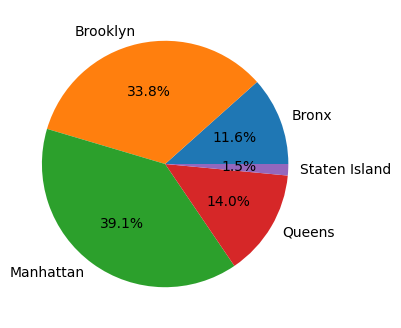

In [ ]:
plot = boroughs.plot.pie(
    y='count',
    labels = boroughs.boro,
    figsize=(4,4),
    autopct='%1.1f%%',   # Formato para porcentaje
    legend=False         # Oculto la leyenda
)

# Eliminar la etiqueta "count" del eje Y
plot.set_ylabel('')

plt.show()

## Accident analysis by record type

In [15]:
record_type_count = df["record_type_description"].value_counts().reset_index()
record_type_count.sort_values(by="count", ascending=False).set_index("record_type_description")
record_type_count["count_normalized"] = round(record_type_count["count"]/record_type_count["count"].sum(), 3)

In [16]:
record_type_count

,record_type_description,count,count_normalized
0,Accident,727,0.727
1,Incident,239,0.239
2,Notification,31,0.031
3,Not DOB Jurisdiction,3,0.003


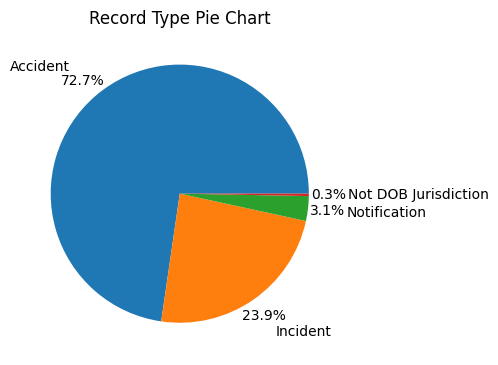

In [ ]:
plot = record_type_count.plot.pie(
    y='count',
    labels=record_type_count["record_type_description"],
    figsize=(5,5),
    autopct='%1.1f%%',
    pctdistance=1.15,
    labeldistance=1.3,
    legend=False        
)

plot.set_ylabel('')

plt.title("Record Type Pie Chart")
plt.tight_layout()
plt.show()

## Fatality index

fatality
0    986
1     14
dtype: int64


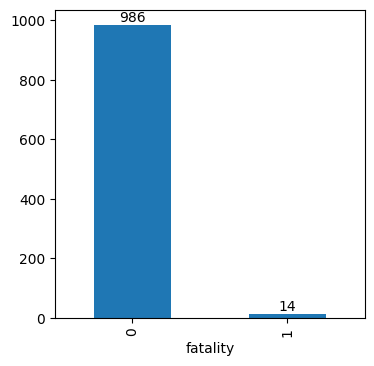

In [18]:
print(df.groupby("fatality").size().sort_values(ascending=False))

ax = df.groupby(by='fatality').size().plot(
    kind='bar',
    figsize=(4, 4))

#Values
ax.bar_label(ax.containers[0])

plt.show()

fatality
0    713
1     14
Name: count, dtype: int64


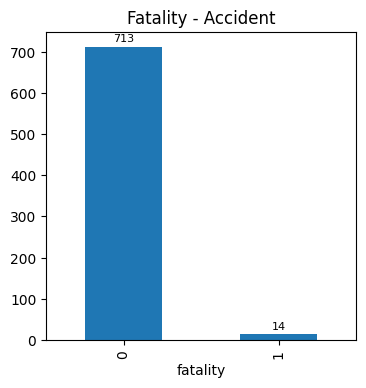

In [19]:
print(df[df["record_type_description"]=="Accident"].fatality.value_counts())

ax = df[df["record_type_description"]=="Accident"].fatality.value_counts().plot(
    kind='bar',
    figsize=(4, 4))

#Values
ax.bar_label(ax.containers[0],
             fontsize=8,
             padding=2
            )
ax.set_title("Fatality - Accident")

plt.show()

In [21]:
fatality_sum = df.groupby("record_type_description")["fatality"].sum().reset_index()
record_type_count = record_type_count.merge(fatality_sum, on="record_type_description", how="left")
record_type_count

,record_type_description,count,count_normalized,fatality
0,Accident,727,0.727,14
1,Incident,239,0.239,0
2,Notification,31,0.031,0
3,Not DOB Jurisdiction,3,0.003,0


In [22]:
df[df["record_type_description"]=="Incident"].fatality.value_counts()


fatality
0    239
Name: count, dtype: int64

Se observa que los 14 casos de fatalidad ocurrieron bajo la categoría de "Accident". 

## Category of the associated cause of incident

In [23]:
df["check2_description"].value_counts().reset_index()

,check2_description,count
0,Worker Fell,389
1,Other Construction Related,357
2,Material Failure (Fell),102
3,Mechanical Construction Equipment,72
4,Scaffold/Shoring Installations,45
5,Excavation/Soil Work,35


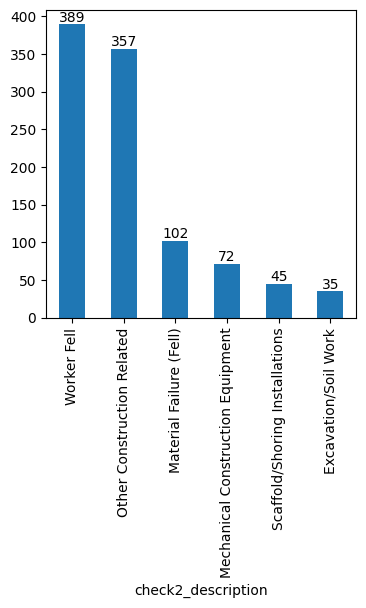

In [24]:
ax = df.groupby(by='check2_description').size().sort_values(ascending=False).plot(
    kind='bar',
    figsize=(4, 4))

#Values
ax.bar_label(ax.containers[0])

plt.show()

In [25]:
description_record_df = df.groupby(by=["check2_description", "record_type_description"]).size().unstack()
description_record_df.sort_values(by="Accident", ascending=False)

record_type_description,Accident,Incident,Not DOB Jurisdiction,Notification
check2_description,,,,
Worker Fell,377.0,9.0,1.0,2.0
Other Construction Related,209.0,123.0,2.0,23.0
Material Failure (Fell),68.0,31.0,NaN,3.0
Mechanical Construction Equipment,47.0,24.0,NaN,1.0
Scaffold/Shoring Installations,16.0,29.0,NaN,NaN
Excavation/Soil Work,10.0,23.0,NaN,2.0


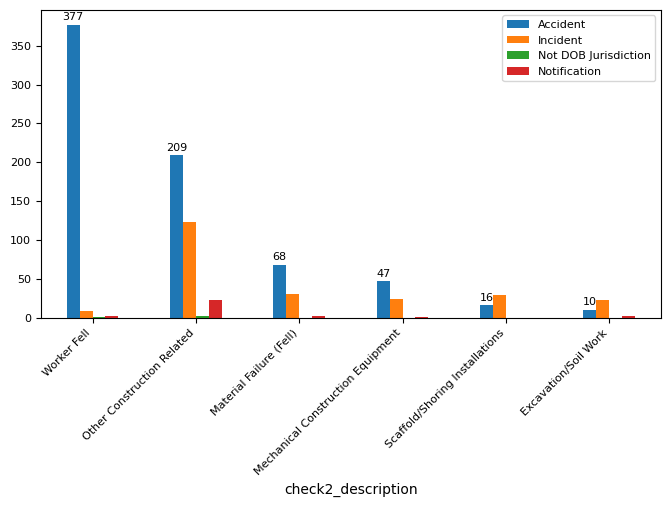

In [ ]:
ax = description_record_df.sort_values(by="Accident", ascending=False).plot(
    kind='bar',
    figsize=(8, 4),
    rot=45,        
    fontsize=8     
)

# Values
ax.bar_label(
    ax.containers[0], 
    fontsize=8,    
    padding=2     
)

#Legend
ax.legend(
    fontsize=8
)

# Alinear el texto rotado para que coincida con la barra
plt.xticks(ha='right') 

plt.show()

In [27]:
description_record_df = df.groupby(by=["check2_description", "injury"]).size()
description_record_df

check2_description                 injury
Excavation/Soil Work               0          26
                                   1           8
                                   2           1
Material Failure (Fell)            0          32
                                   1          66
                                   2           4
Mechanical Construction Equipment  0          26
                                   1          41
                                   2           3
                                   4           1
                                   5           1
Other Construction Related         0         134
                                   1         217
                                   2           6
Scaffold/Shoring Installations     0          28
                                   1          17
Worker Fell                        0           9
                                   1         371
                                   2           9
dtype: int64

In [49]:
description_fatality_df = df.groupby(by=["check2_description", "fatality"]).size().unstack(fill_value=0)
description_fatality_df["fatality_rate"] = round(description_fatality_df[1] / (description_fatality_df[1]+ description_fatality_df[0])*100, 2)
description_fatality_df.sort_values(by="fatality_rate", ascending = False)

fatality,0,1,fatality_rate
check2_description,,,
Excavation/Soil Work,34,1,2.86
Mechanical Construction Equipment,70,2,2.78
Worker Fell,381,8,2.06
Material Failure (Fell),101,1,0.98
Other Construction Related,355,2,0.56
Scaffold/Shoring Installations,45,0,0.00
